formation start	2018-01-01	formation end	2019-01-01
transaction start	2019-01-01	transaction end	2019-07-01
RESULTS will be saved at rev_result_0207//2019-01-01_1Y_2019-01-01_6M/


100%|██████████| 20/20 [00:05<00:00,  3.94it/s]


run cost time 56.459052324295044 s



Start date,2019-01-02
End date,2019-07-01
Total months,5
,Backtest
Annual return,105131046.8%
Cumulative returns,69658.2%
Annual volatility,3933.1%
Sharpe ratio,1.68
Calmar ratio,5186491.85
Stability,0.70
Max drawdown,-20.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.27,2019-01-11,2019-01-23,2019-01-25,11
1,19.46,2019-02-28,2019-03-11,2019-04-04,26
2,13.21,2019-02-01,2019-02-11,2019-02-19,13
3,7.64,2019-01-02,2019-01-03,2019-01-04,3
4,7.62,2019-01-08,2019-01-09,2019-01-11,4


Stress Events,mean,min,max
New Normal,26.15%,-15.55%,2701.80%


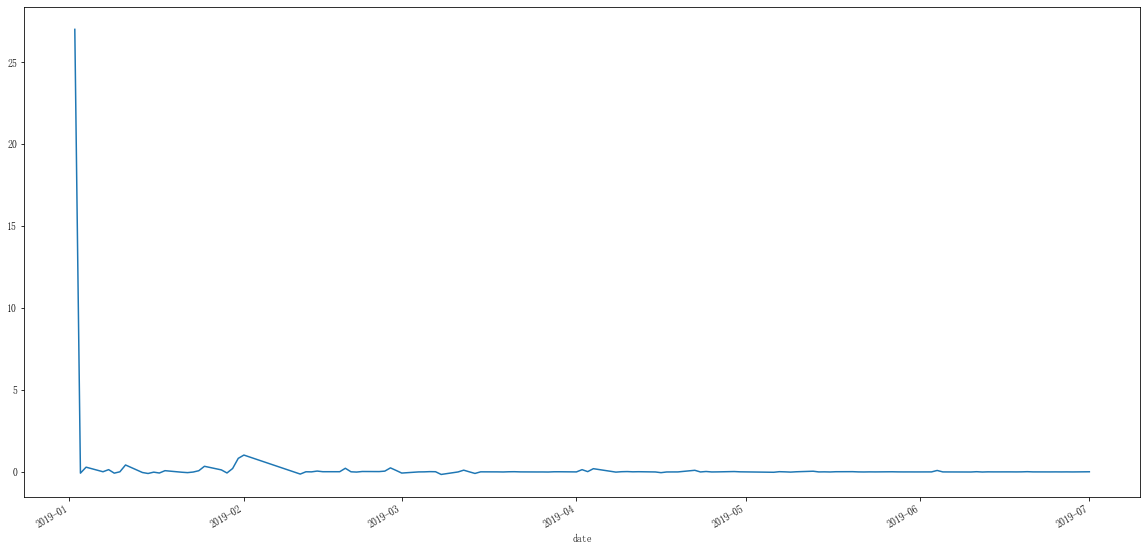

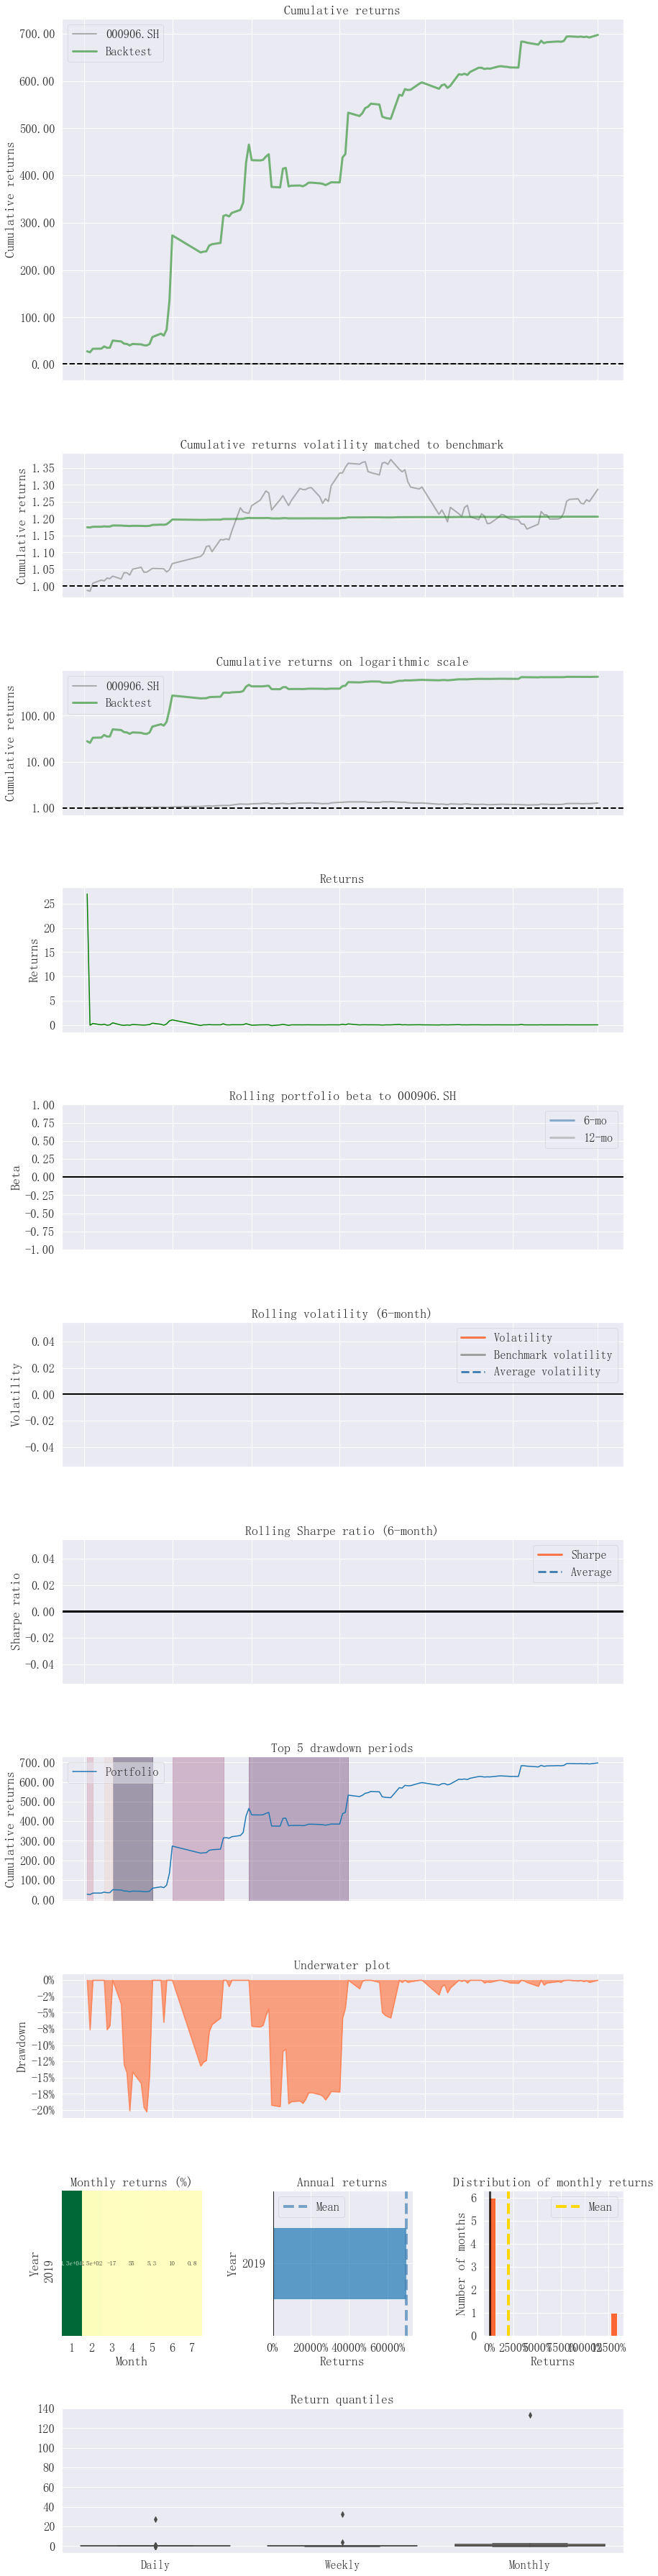

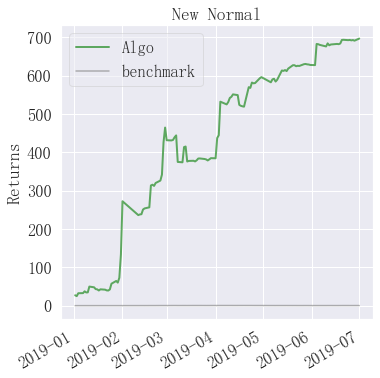

formation start	2018-07-01	formation end	2019-07-01
transaction start	2019-07-01	transaction end	2020-01-01
RESULTS will be saved at rev_result_0207//2019-07-01_1Y_2019-07-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.01it/s]


run cost time 46.592442750930786 s



Start date,2019-07-01
End date,2019-12-31
Total months,6
,Backtest
Annual return,95579817.3%
Cumulative returns,97665.0%
Annual volatility,14885.5%
Sharpe ratio,1.49
Calmar ratio,2282459.64
Stability,0.51
Max drawdown,-41.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.88,2019-07-04,2019-07-10,2019-07-11,6
1,23.35,2019-07-11,2019-07-22,2019-07-23,9
2,16.67,2019-08-28,2019-09-25,2019-11-05,50
3,9.82,2019-07-25,2019-08-06,2019-08-08,11
4,7.61,2019-08-12,2019-08-14,2019-08-21,8


Stress Events,mean,min,max
New Normal,87.99%,-40.47%,10519.34%


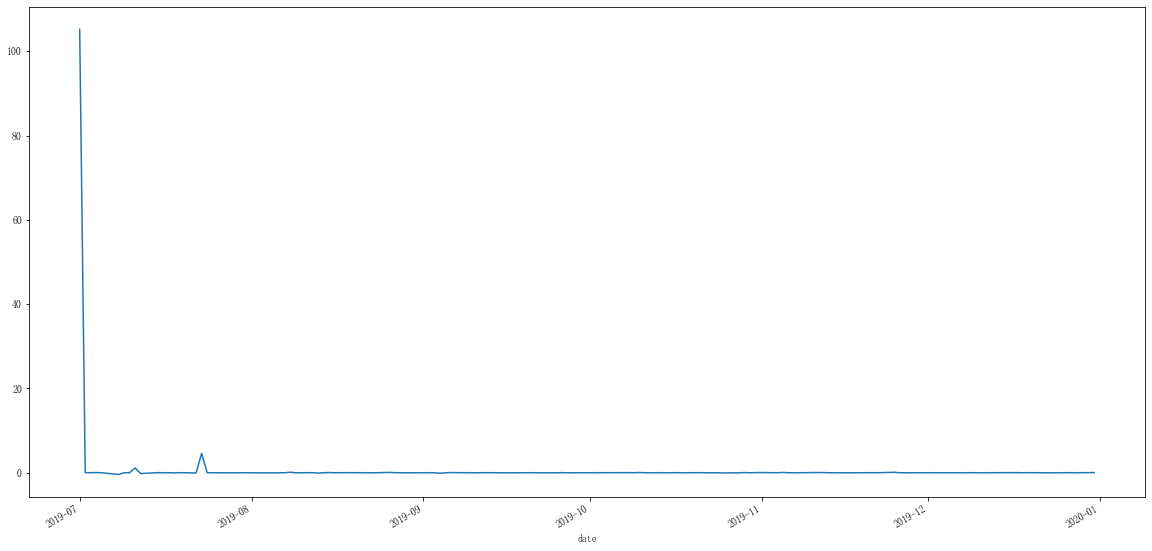

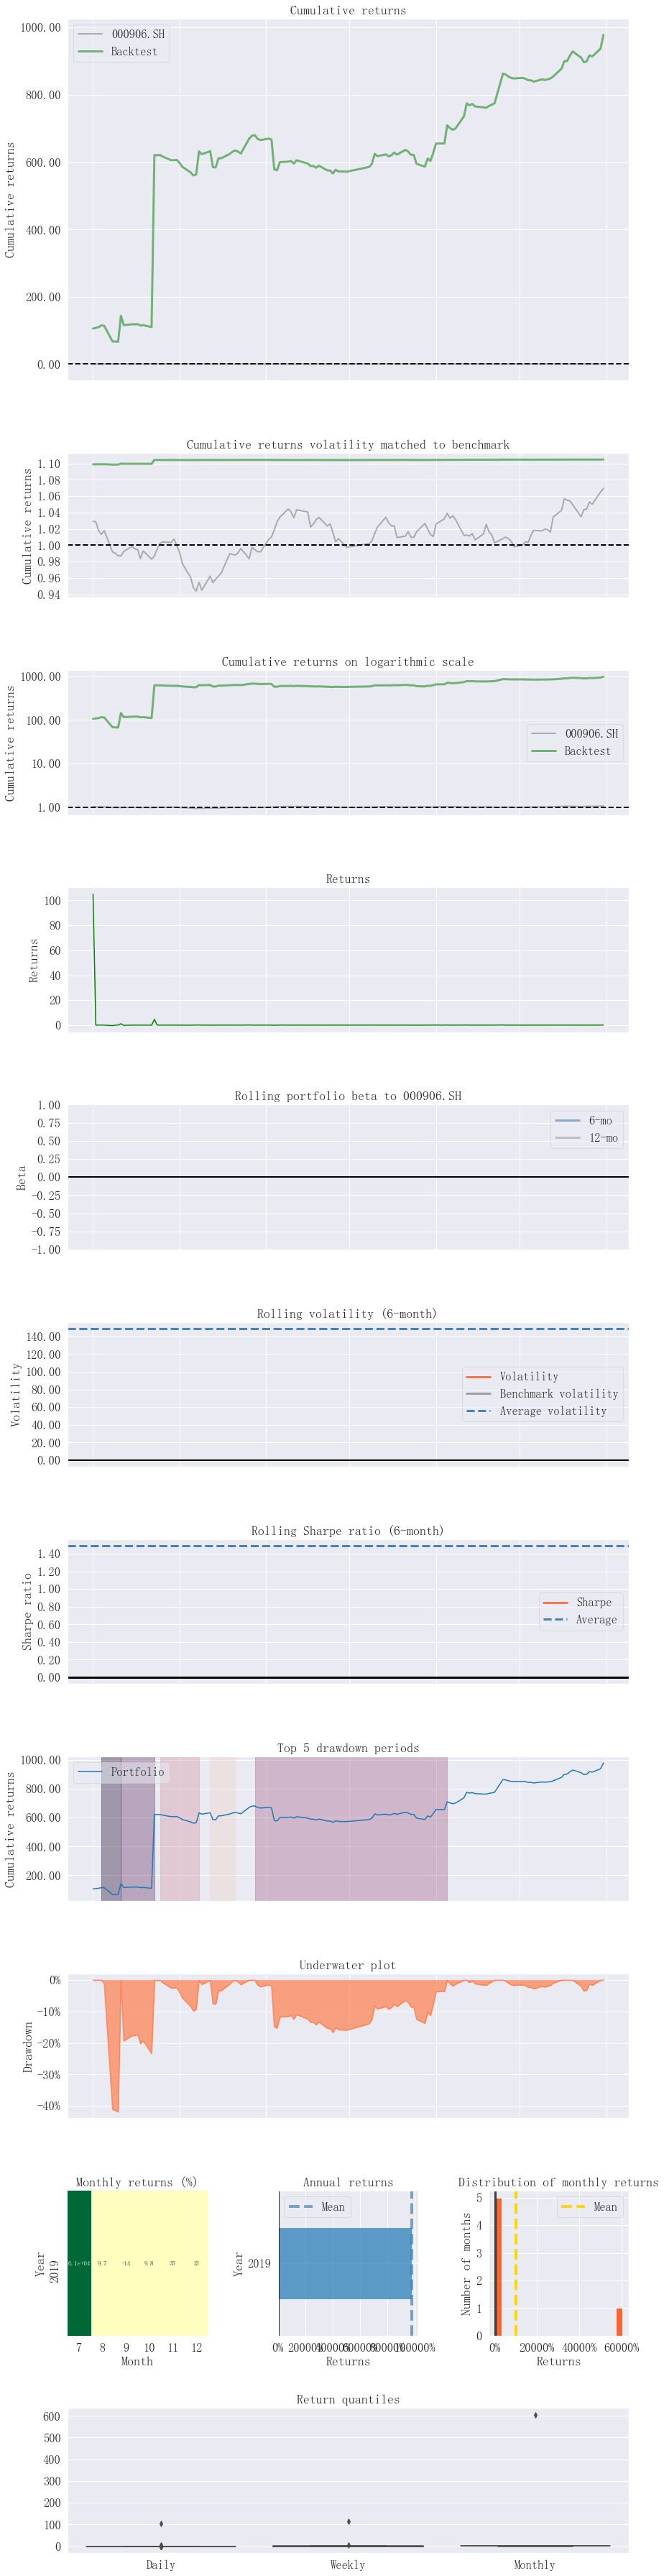

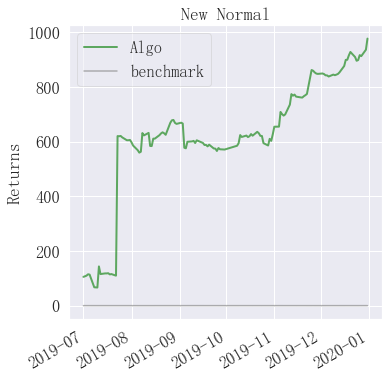

formation start	2019-01-01	formation end	2020-01-01
transaction start	2020-01-01	transaction end	2020-07-01
RESULTS will be saved at rev_result_0207//2020-01-01_1Y_2020-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.14it/s]


run cost time 43.38203263282776 s



Start date,2020-01-02
End date,2020-07-01
Total months,5
,Backtest
Annual return,42132755.6%
Cumulative returns,42928.0%
Annual volatility,27749.3%
Sharpe ratio,-1.91
Calmar ratio,3140.93
Stability,NaN
Max drawdown,-13414.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,61.79,2020-02-06,2020-02-12,2020-02-28,17
1,16.19,2020-04-29,2020-05-12,2020-06-18,37
2,15.51,2020-03-25,2020-03-27,2020-04-08,11
3,10.70,2020-03-02,2020-03-04,2020-03-06,5
4,4.54,2020-06-19,2020-07-01,NaT,NaN


ERR:TRANSACTION - 2020-01-01 TO 2020-07-01 evaluation NaT


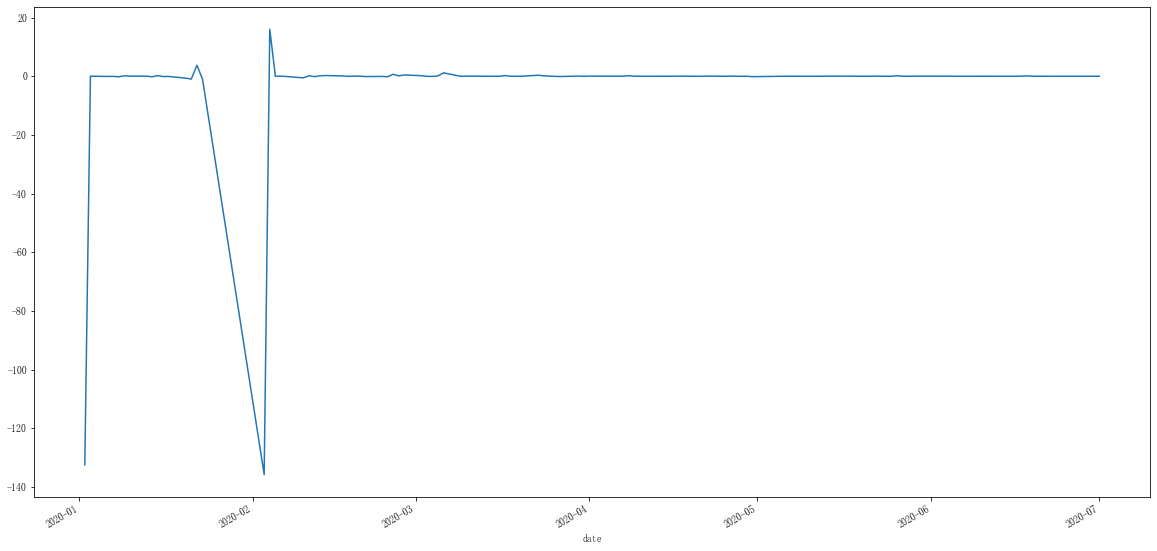

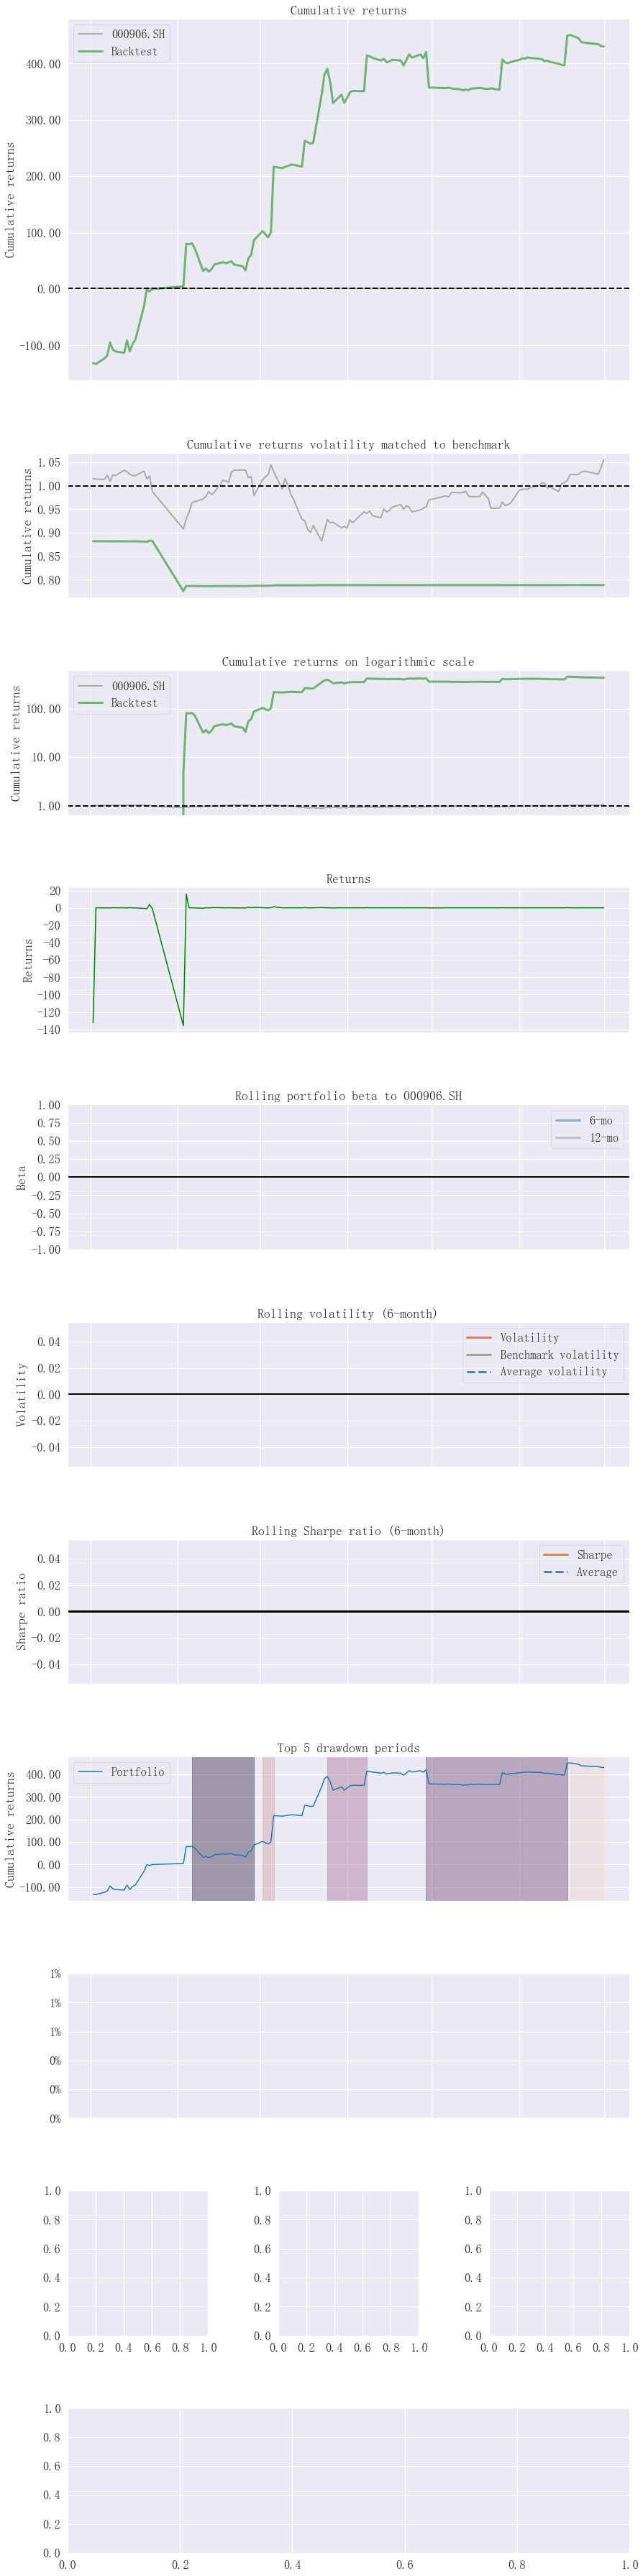

formation start	2019-07-01	formation end	2020-07-01
transaction start	2020-07-01	transaction end	2021-01-01
RESULTS will be saved at rev_result_0207//2020-07-01_1Y_2020-07-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.17it/s]


run cost time 49.54848647117615 s



Start date,2020-07-01
End date,2020-12-31
Total months,6
,Backtest
Annual return,1676957.0%
Cumulative returns,12850.1%
Annual volatility,21141.0%
Sharpe ratio,1.43
Calmar ratio,17947.76
Stability,0.00
Max drawdown,-93.4%


ERR:TRANSACTION - 2020-07-01 TO 2021-01-01 evaluation NaT


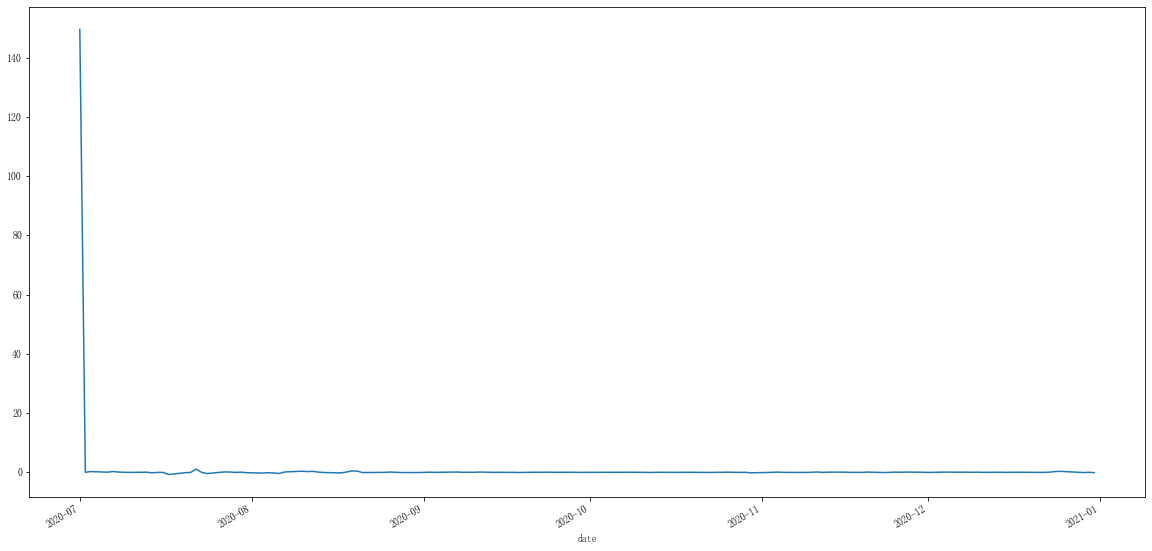

formation start	2020-01-01	formation end	2021-01-01
transaction start	2021-01-01	transaction end	2021-07-01
RESULTS will be saved at rev_result_0207//2021-01-01_1Y_2021-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.38it/s]



run cost time 54.0614058971405 s



Start date,2021-01-04
End date,2021-07-01
Total months,5
,Backtest
Annual return,18970598.7%
Cumulative returns,30976.2%
Annual volatility,13593.9%
Sharpe ratio,0.39
Calmar ratio,202.80
Stability,NaN
Max drawdown,-93545.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,93545.10,2021-01-13,2021-03-22,2021-03-23,50
1,3108.69,2021-03-29,2021-04-07,2021-04-13,12
2,33.42,2021-04-19,2021-04-29,2021-05-12,18
3,6.60,2021-06-02,2021-06-16,2021-06-21,14
4,2.07,2021-06-23,2021-07-01,NaT,NaN


ERR:TRANSACTION - 2021-01-01 TO 2021-07-01 evaluation NaT


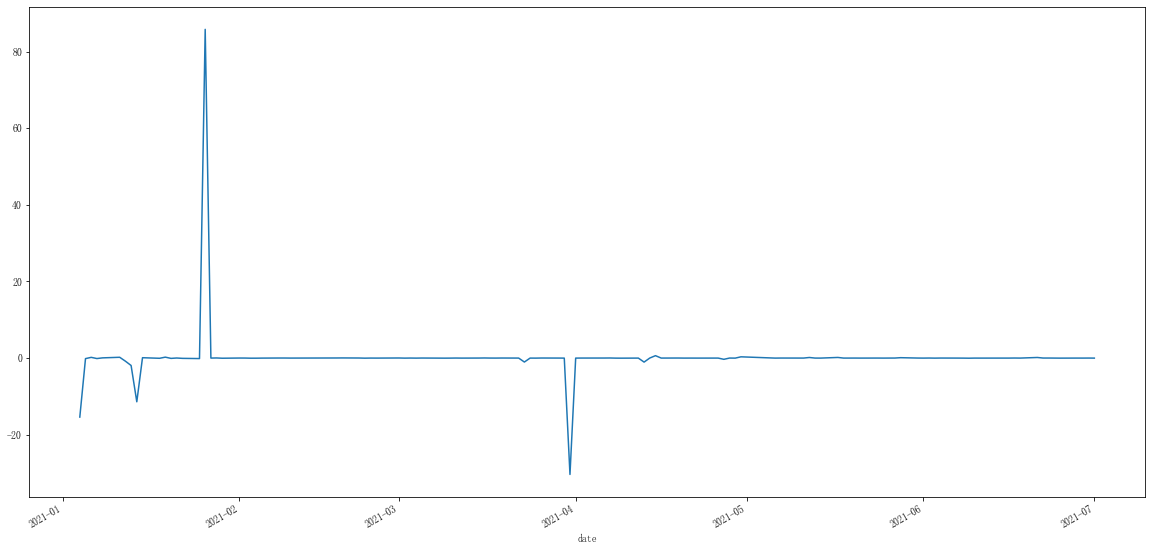

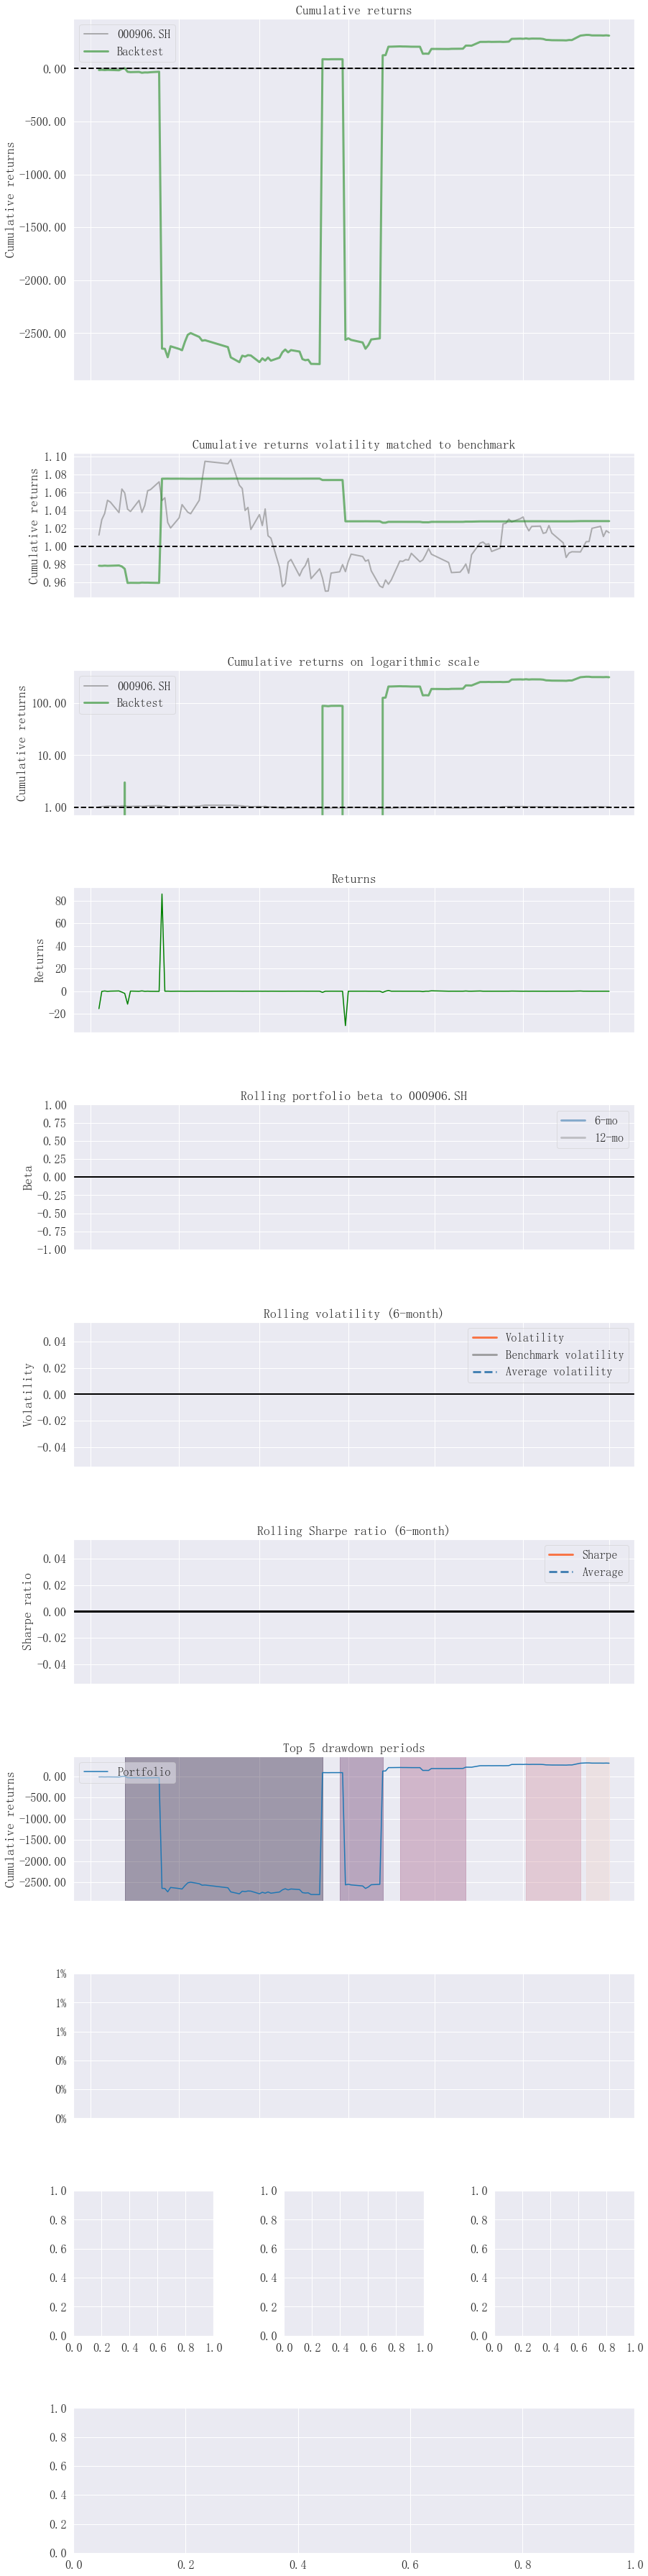

formation start	2020-07-01	formation end	2021-07-01
transaction start	2021-07-01	transaction end	2022-01-01
RESULTS will be saved at rev_result_0207//2021-07-01_1Y_2021-07-01_6M/


100%|██████████| 20/20 [00:05<00:00,  3.53it/s]


run cost time 67.1981725692749 s



Start date,2021-07-01
End date,2021-12-31
Total months,5
,Backtest
Annual return,43204995.5%
Cumulative returns,62331.6%
Annual volatility,37020.7%
Sharpe ratio,1.43
Calmar ratio,885933.08
Stability,0.80
Max drawdown,-48.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.77,2021-07-20,2021-08-05,2021-08-26,28
1,27.81,2021-09-01,2021-09-10,2021-09-28,20
2,25.38,2021-10-20,2021-10-26,2021-12-01,31
3,20.38,2021-07-05,2021-07-08,2021-07-20,12
4,1.94,2021-09-28,2021-10-12,2021-10-15,14


Stress Events,mean,min,max
New Normal,209.78%,-33.91%,26074.45%


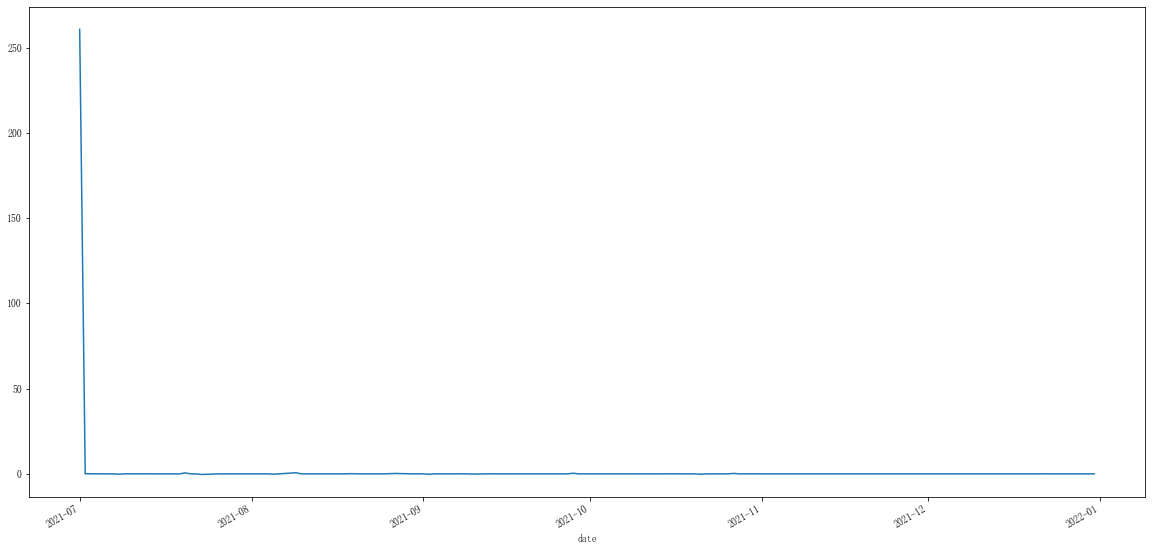

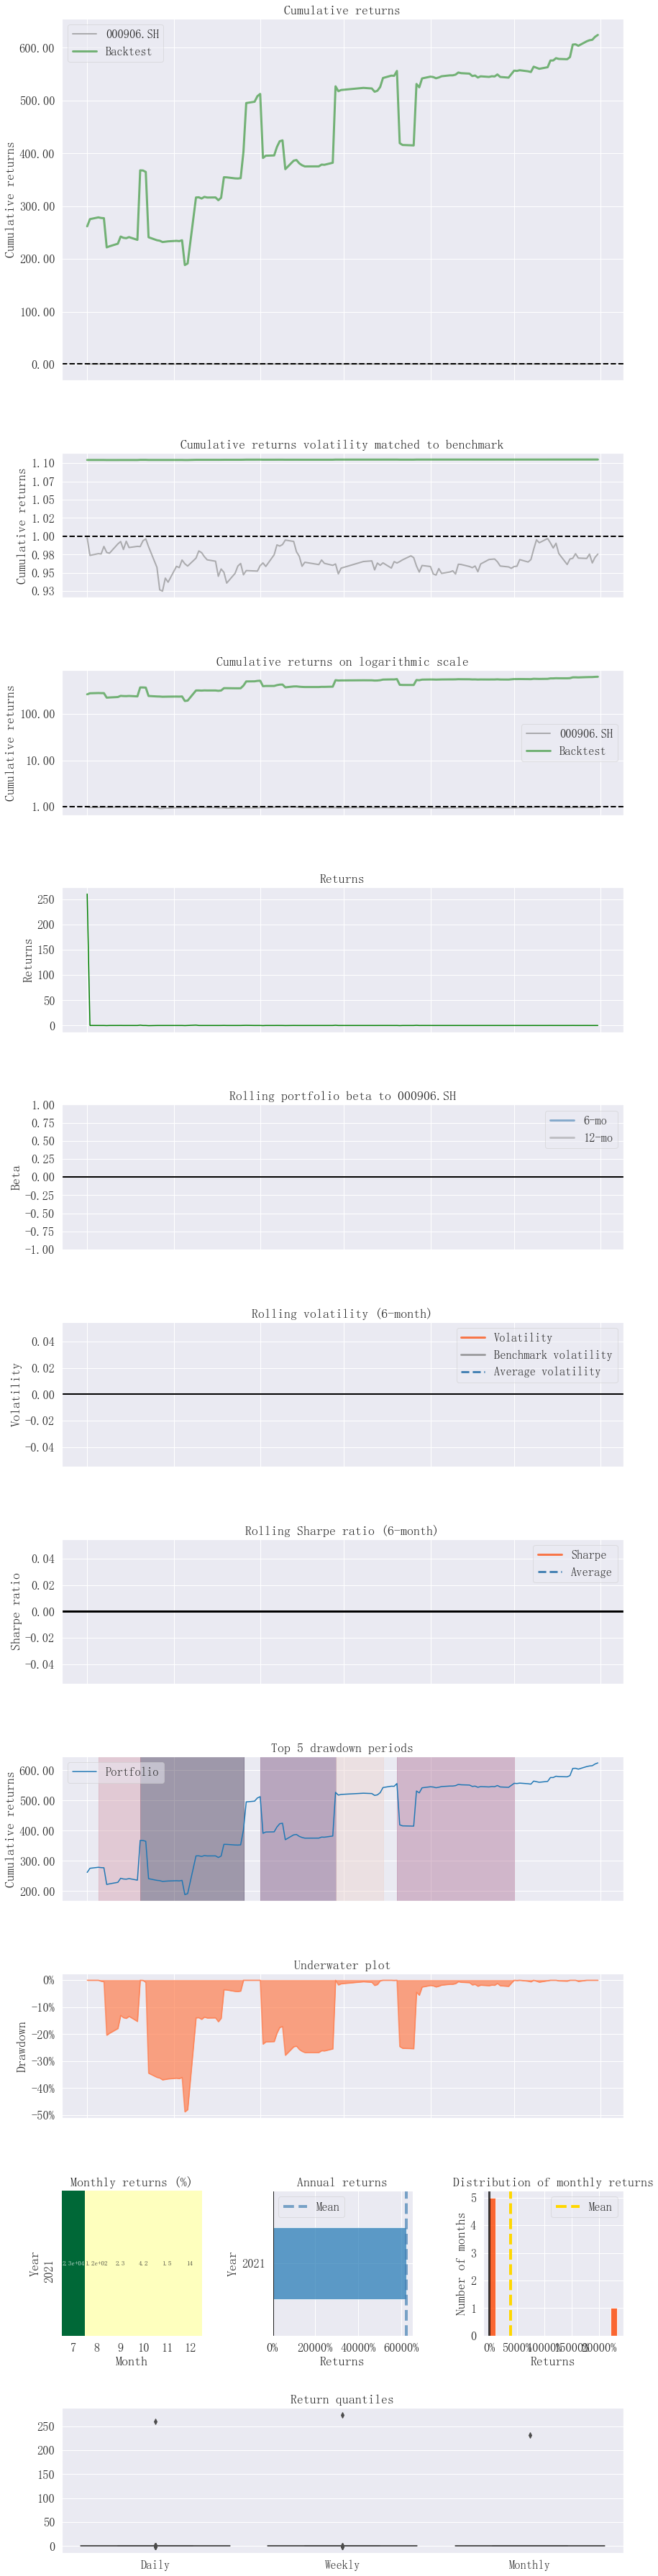

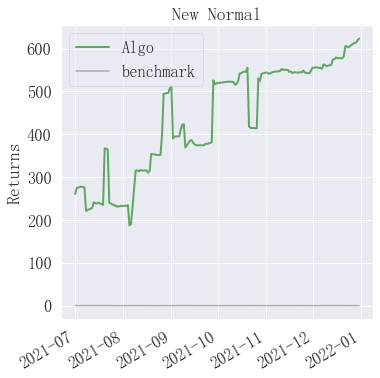

formation start	2021-01-01	formation end	2022-01-01
transaction start	2022-01-01	transaction end	2022-07-01
RESULTS will be saved at rev_result_0207//2022-01-01_1Y_2022-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.21it/s]


run cost time 68.47161436080933 s



Start date,2022-01-04
End date,2022-07-01
Total months,5
,Backtest
Annual return,14195960.8%
Cumulative returns,25753.7%
Annual volatility,9919.2%
Sharpe ratio,-1.39
Calmar ratio,2094.32
Stability,NaN
Max drawdown,-6778.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,62.07,2022-04-15,2022-04-19,2022-04-27,9
1,60.58,2022-02-10,2022-02-17,2022-03-07,18
2,51.57,2022-04-28,2022-05-05,2022-05-25,20
3,45.79,2022-01-20,2022-01-25,2022-02-08,14
4,12.28,2022-03-08,2022-03-15,2022-03-17,8


ERR:TRANSACTION - 2022-01-01 TO 2022-07-01 evaluation NaT


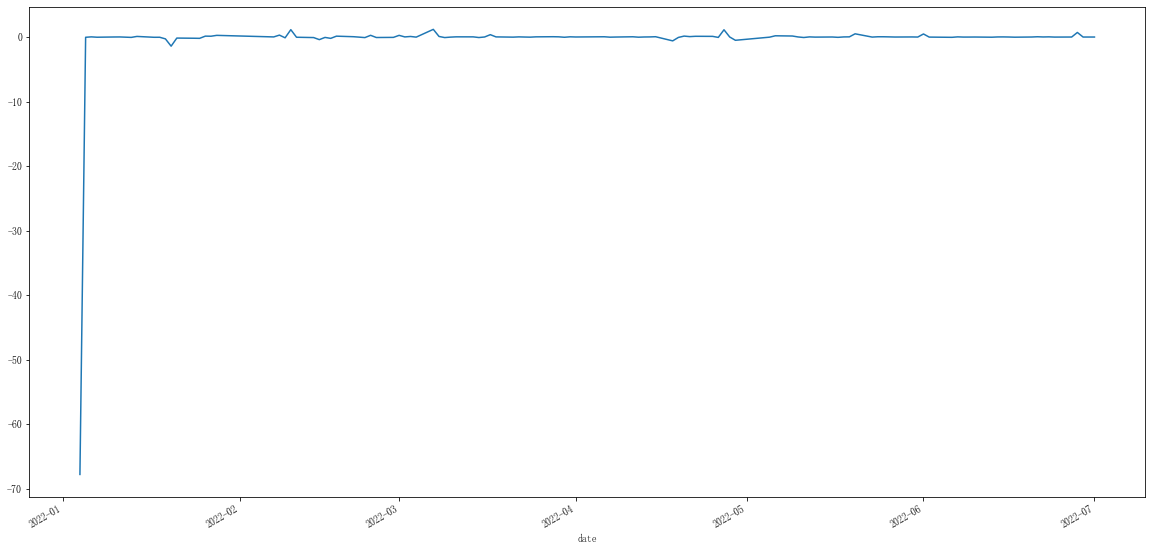

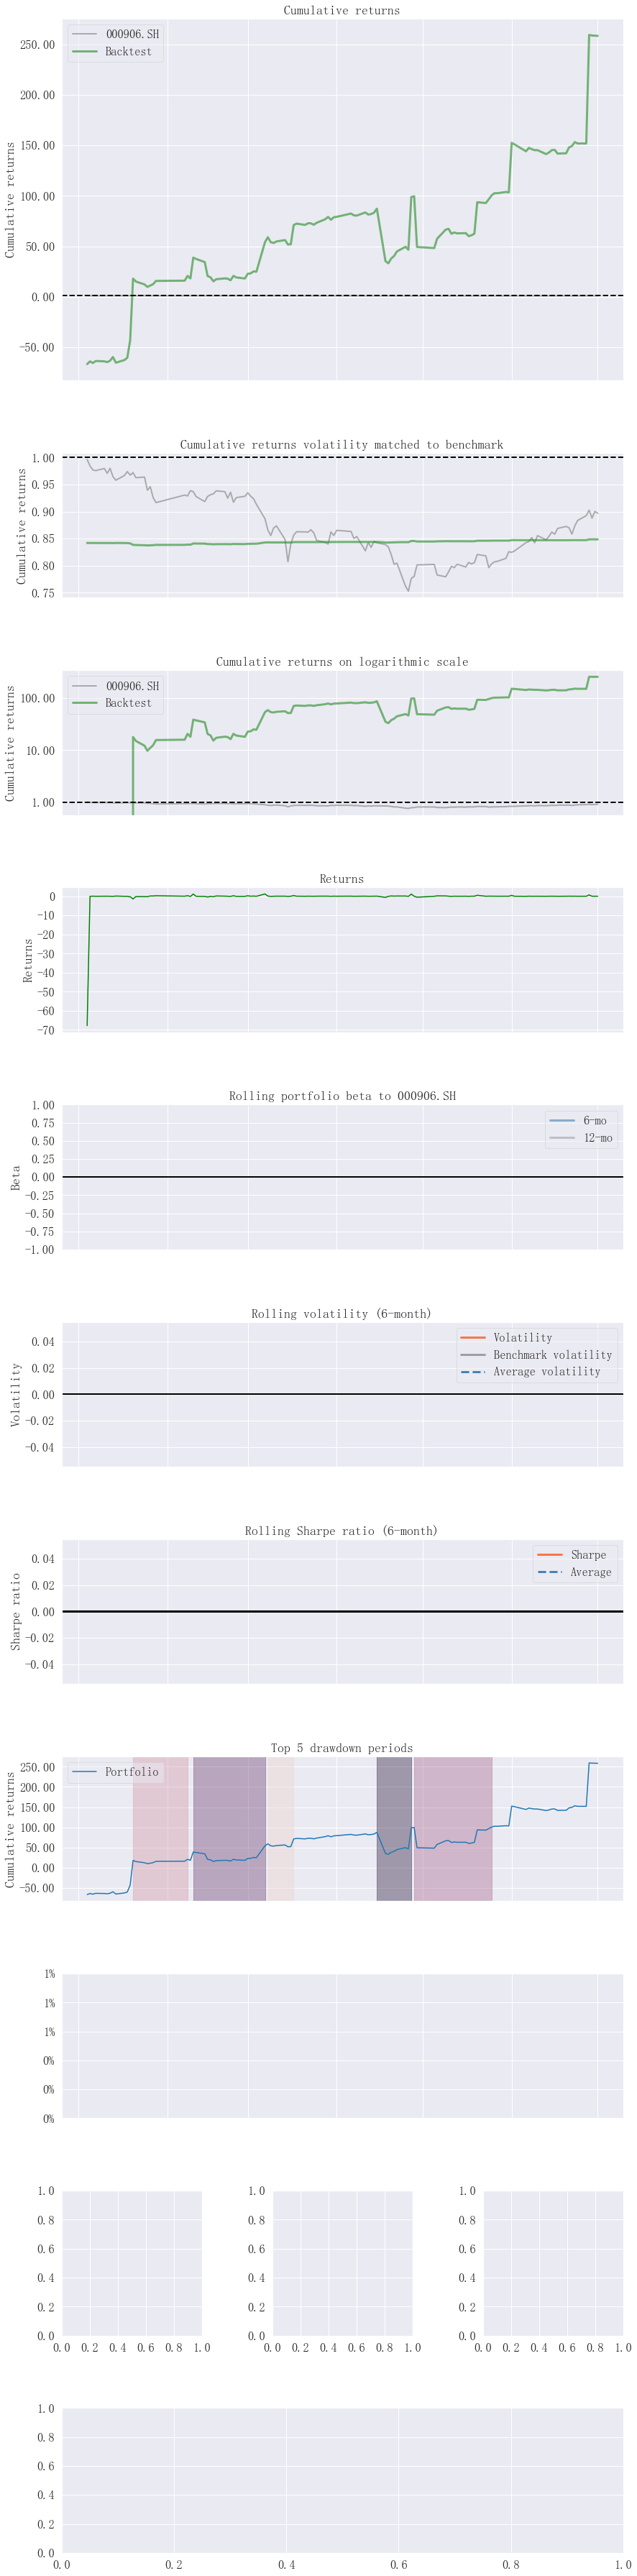

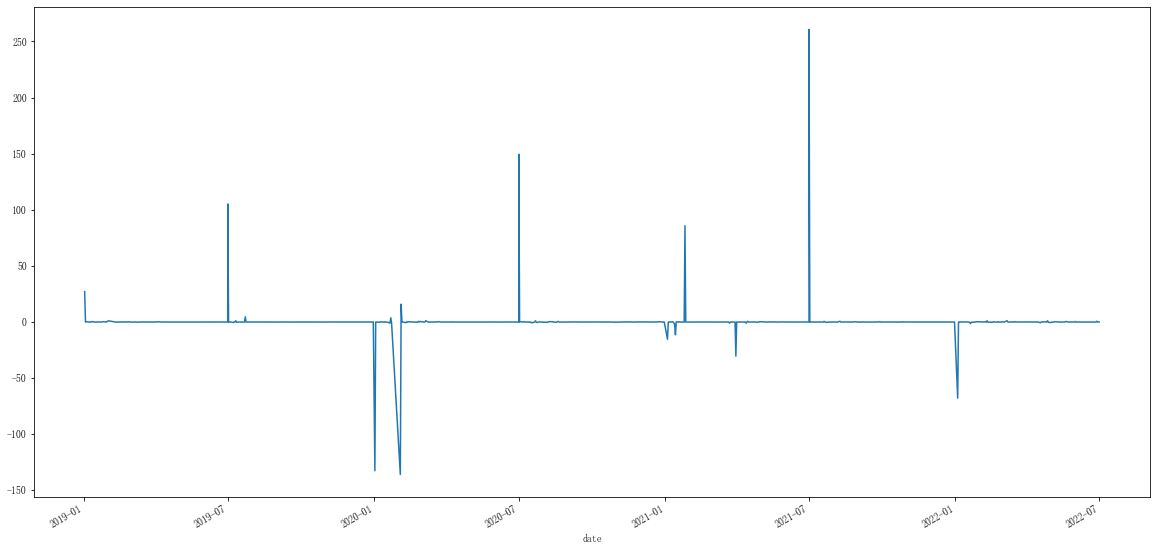

Start date,2019-01-02
End date,2022-07-01
Total months,40
,Backtest
Annual return,25891633.5%
Cumulative returns,1.9061593604376478e+20%
Annual volatility,21201.2%
Sharpe ratio,0.37
Calmar ratio,276.78
Stability,NaN
Max drawdown,-93545.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,93545.10,2021-01-13,2021-03-22,2021-03-23,50
1,13414.12,2019-12-31,2020-01-03,2020-02-03,25
2,6778.32,2021-12-31,2022-01-04,2022-01-20,15
3,3108.69,2021-03-29,2021-04-07,2021-04-13,12
4,870.56,2020-07-13,2021-01-11,2021-01-13,133


Stress Events,mean,min,max
New Normal,31.44%,-13580.33%,26074.45%


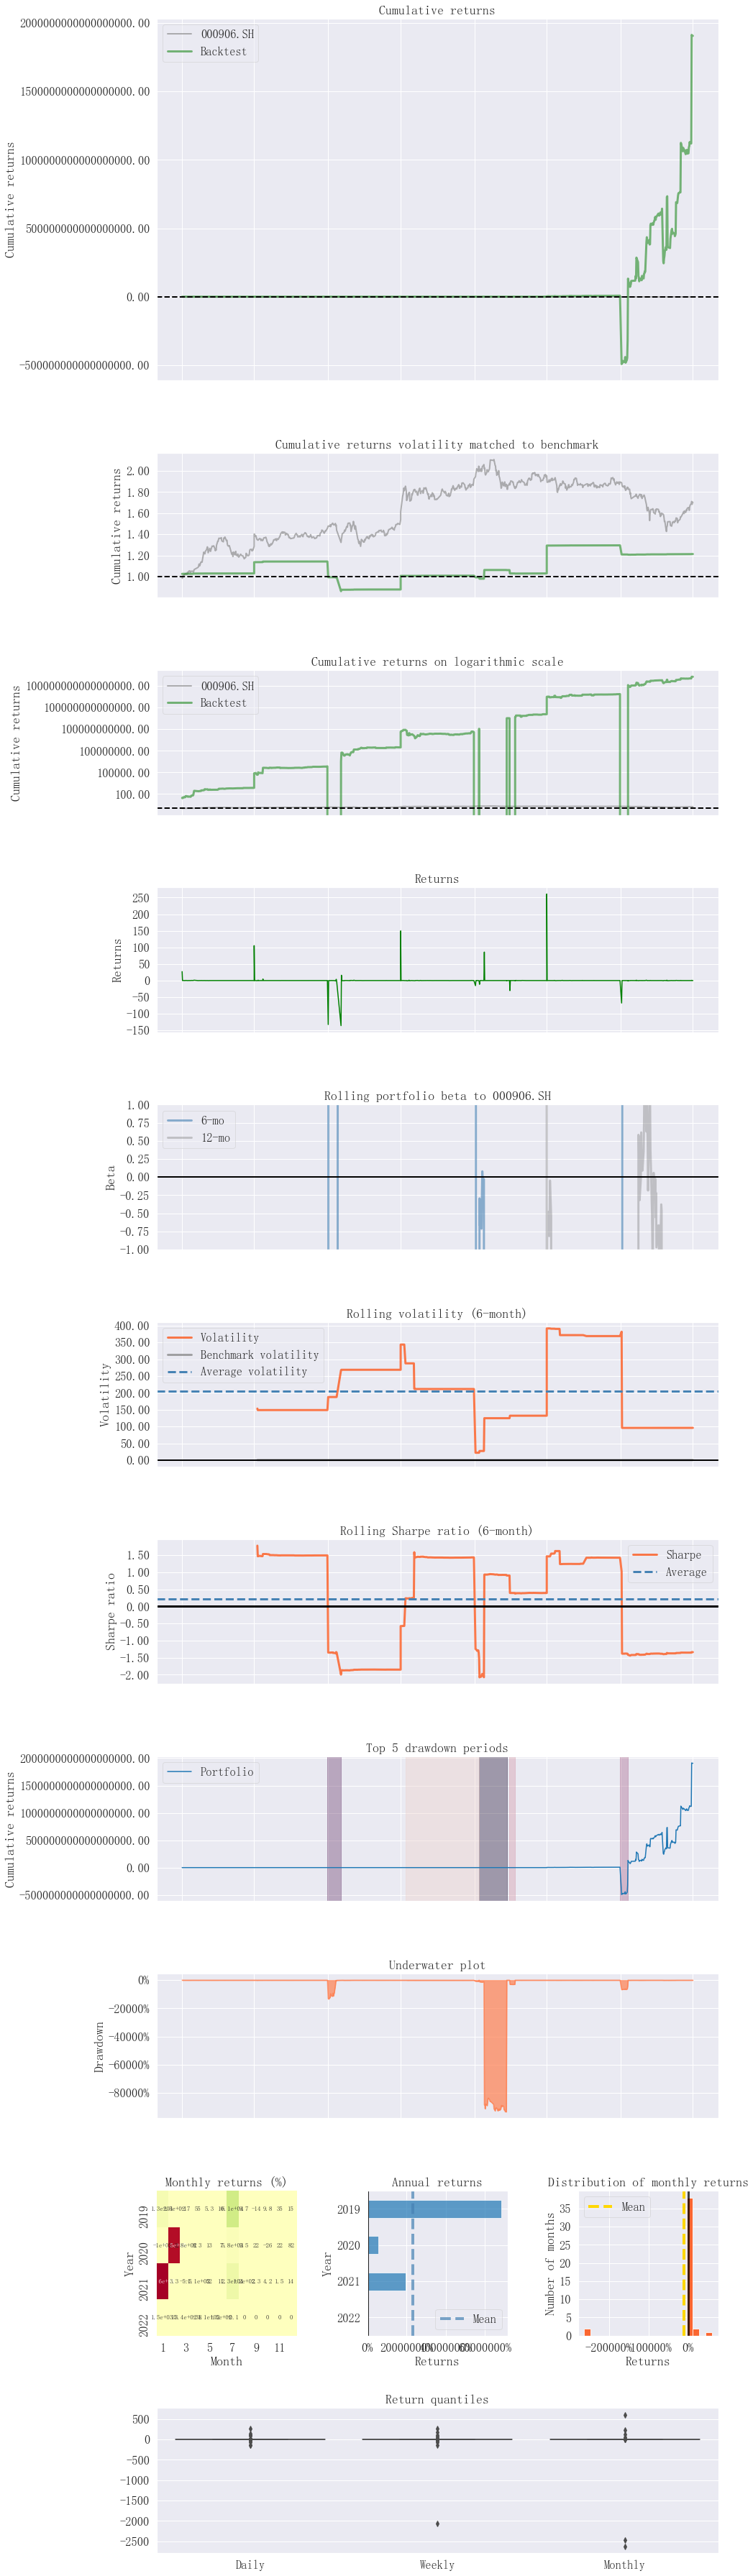

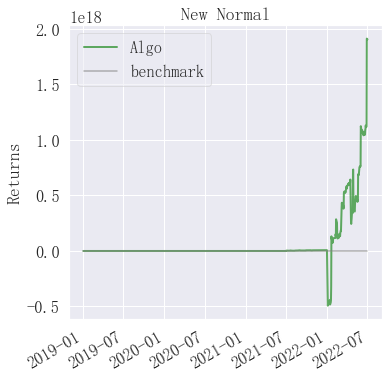

In [11]:
# -*- coding: utf-8 -*-
"""
Created on 2023/1/31 14:14

@author: Susan
"""
import matplotlib.pyplot as plt
import pandas as pd
from CommonUse.funcs import read_pkl

from pt_utils.PairTrading import PairTrading

trans_start = '2019-01-01'
end_date = '2022-01-01'
out_folder = 'rev_result_0207/'

col = ['cash', 'value', 'rev']
flow_table = pd.DataFrame(columns=col)

pair_num = 20
invest_amount = 2e6
invest_num = invest_amount / pair_num
index_rev = read_pkl('raw/000906_ret.pkl')
# %% 策略执行
while trans_start <= end_date:
    pt = PairTrading(trans_start, trans_start, out_folder, c=0.0015, c_ratio=0.0015, pair_num=pair_num, norm_bar=0.007)
    flow_df = pt.run(invest_num)
    try:
        pt.evaluation(flow_df, index_rev)
    except:
        print(f'ERR:TRANSACTION - {pt.trans_start} TO {pt.trans_end} evaluation NaT')
    plt.show()
    flow_table = pd.concat([flow_table, flow_df[col]])
    trans_start = pt.trans_end
PairTrading.clear_object_data()
flow_table.index.name = 'date'
flow_table.reset_index().to_csv(out_folder + '收益率交易收益汇总.csv', index=False)
plt.figure(figsize=(20, 10))
flow_table['rev'].plot()
plt.savefig(out_folder + f'收益率_{trans_start}_{end_date}.png')
plt.show()

PairTrading.evaluation(flow_table, index_rev)